In [2]:
import pandas as pd

In [3]:
from collections import Counter

In [4]:
pwd

'/content'

In [5]:
import os
print(os.getcwd())

/content


In [6]:
# Read the CSV file using pandas
df = pd.read_csv("BC_Transaction.csv")

In [7]:
df.head()

,A,blockNum,txHash,gas limit,gas price,from,to,data,value,tx type,used gas,status
0,0,0x1042864,0xde9a608704ab9bbdc50e2686dbab7e5a5ffe76946c73...,21000,45.651805,0x043022ef9fca1066024d19d681e2ccf44ff90de3,0xf4826e0892195796fae28d8f362ca294704d89c1,0x,1.235000e+18,financial,21000.0,1.0
1,1,0x1042864,0x55a1c163c0900c82c01c1d7bd1ad26251fecc6492883...,21000,32.570537,0x82d03f4bae63b03b4da9f45d812dd519610616b7,0x82d03f4bae63b03b4da9f45d812dd519610616b7,0x,3.368850e+15,financial,21000.0,1.0
2,2,0x1042864,0x1ea3a9c021d1070bbb304a640bb038f99fa3b68aa613...,21000,32.570537,0xb4ce76ac0e0b278b5047d3ed0cbcdaab9c84e6bd,0xb0ba83044740818d5691b691be7f93affc221bdb,0x,2.186940e+16,financial,21000.0,1.0
3,3,0x1042864,0x35c51f095757079f5a8d95d725540b8ee4a6bc8bef1a...,126164,24.507473,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,0x642f1b498c00e1ccc2afff80f6cc6144eaeb95c46cc3...,4.426607e+07,contract,88315.0,1.0
4,4,0x1042864,0x55d38abdef2a23dc112735b96c526087ca2c0e6c68d5...,218432,24.607473,0xb20eeb6ef659b0da5ecc3403182db2129a43f615,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x3593564c000000000000000000000000000000000000...,7.533000e+18,contract,135536.0,1.0


In [8]:
df.describe()

,A,gas limit,gas price,value,used gas,status
count,4814.000000,4.814000e+03,4814.000000,4.813000e+03,4.813000e+03,4813.000000
mean,2406.500000,2.050853e+05,24.809041,6.359310e+17,1.140087e+05,0.986703
std,1389.826428,1.053160e+06,16.353676,1.868203e+19,7.459849e+05,0.114557
min,0.000000,2.100000e+04,20.198135,0.000000e+00,2.100000e+04,0.000000
25%,1203.250000,4.210425e+04,21.975958,0.000000e+00,2.100000e+04,1.000000
50%,2406.500000,8.827000e+04,23.002516,0.000000e+00,5.197000e+04,1.000000
75%,3609.750000,1.919745e+05,24.902516,2.530000e+16,9.421000e+04,1.000000
max,4813.000000,2.710000e+07,703.510078,1.259240e+21,2.192321e+07,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4814 entries, 0 to 4813
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          4814 non-null   int64  
 1   blockNum   4814 non-null   object 
 2   txHash     4814 non-null   object 
 3   gas limit  4814 non-null   int64  
 4   gas price  4814 non-null   float64
 5   from       4814 non-null   object 
 6   to         4811 non-null   object 
 7   data       4814 non-null   object 
 8   value      4813 non-null   float64
 9   tx type    4813 non-null   object 
 10  used gas   4813 non-null   float64
 11  status     4813 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 451.4+ KB


dataset valued and explained from the csv


In [10]:
#number of missing values
df.isnull().sum()

A            0
blockNum     0
txHash       0
gas limit    0
gas price    0
from         0
to           3
data         0
value        1
tx type      1
used gas     1
status       1
dtype: int64

In [11]:
# Assuming your data is in a pandas DataFrame called 'df'
df = df.dropna()

print(df.isnull().sum())

A            0
blockNum     0
txHash       0
gas limit    0
gas price    0
from         0
to           0
data         0
value        0
tx type      0
used gas     0
status       0
dtype: int64


there are missing values in to column .

In [13]:
#Number of unique values in each column
df.nunique()

A            4810
blockNum       36
txHash       4810
gas limit    1508
gas price    1027
from         3181
to           1869
data         2417
value        1608
tx type         2
used gas     1716
status          2
dtype: int64

In [14]:
# Explore value counts of categorical columns
df['tx type'].value_counts()

tx type
contract     3348
financial    1462
Name: count, dtype: int64

In [15]:
print(df.columns)

Index(['A', 'blockNum', 'txHash', 'gas limit', 'gas price', 'from', 'to',
       'data', 'value', 'tx type', 'used gas', 'status'],
      dtype='object')


In [16]:
# Explore value counts of 'status' column
df['status'].value_counts()

status
1.0    4746
0.0      64
Name: count, dtype: int64

In [17]:
#highest transaction from address if any
df['from'].value_counts().head()

from
0xa152f8bb749c55e9943a3a0a3111d18ee2b3f94e    83
0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88    60
0x54d247727f3bf3ab9b6f420f57a9c6f8ecb5a907    53
0x061f7937b7b2bc7596539959804f86538b6368dc    48
0xf89d7b9c864f589bbf53a82105107622b35eaa40    36
Name: count, dtype: int64

all addresses are unique so no two transaction from same address

In [18]:
#total count
df.shape[0]

4810

In [19]:
print(sorted(Counter(df['status']).items()))

[(0.0, 64), (1.0, 4746)]


In [20]:
trans1 = df[df['status']==1]
trans0 = df[df['status']==0]

In [21]:
print(trans1.shape,trans0.shape,df.shape)

(4746, 12) (64, 12) (4810, 12)


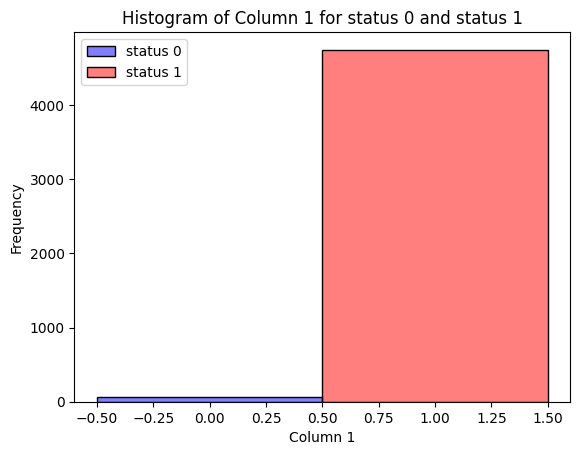

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histograms for numerical columns in trans0 and trans1
sns.histplot(trans0['status'], color='blue', alpha=0.5, label='status 0')
sns.histplot(trans1['status'], color='red', alpha=0.5, label='status 1')
plt.legend()
plt.xlabel('Column 1')
plt.ylabel('Frequency')
plt.title('Histogram of Column 1 for status 0 and status 1')
plt.show()

The histogram defines the unbalanced dataset .Hence teh next step tpo determine what method to balance the dataset was evaluated.


In [23]:
X = df.drop(columns=['status'])
Y = df['status']

In [24]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [25]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: albumentations, bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick


In [26]:
pip install --upgrade scikit-learn

In [27]:
pip install --upgrade imbalanced-learn

In [28]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

To balance the data , the randomsampling technique of oversampling and undersampling was choosen

In [29]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming 'Y' is a NumPy array, replace NaN values with a suitable strategy
# For example, replacing with the most frequent value:
most_frequent_value = np.nanmax(Y)  # Replace with appropriate strategy if needed
Y_no_nan = np.nan_to_num(Y, nan=most_frequent_value)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y_no_nan)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0.0, 4746), (1.0, 4746)] (9492,)


In [30]:
from imblearn.under_sampling import RandomUnderSampler
most_frequent_value = np.nanmax(Y)  # Replace with appropriate strategy if needed
Y_no_nan = np.nan_to_num(Y, nan=most_frequent_value)

rus=RandomUnderSampler(random_state=0)
# Pass the NaN-filled version of Y to fit_resample
X_resampled,y_resampled = rus.fit_resample(X,Y_no_nan)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0.0, 64), (1.0, 64)] (128,)


Finding the most frequent value in Y to replace NaNs.this replaces NaNs in Y with the most frequent value
initializing RandomUnderSampler with a fixed random state for reproducibility.
Apply undersampling to X and Y (with NaNs replaced) **bold text**

In [31]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np

# Assuming X and Y are already defined and preprocessed
# Handle NaN values in 'Y' before resampling
Y_no_nan = np.nan_to_num(Y, nan=np.nanmax(Y))  # Replace NaN with the most frequent value, adjust as needed

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y_no_nan)  # Use the modified Y

print(f"Original dataset shape: {Counter(Y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({1.0: 4746, 0.0: 64})
Resampled dataset shape: Counter({1.0: 4746, 0.0: 4746})


Based on the outcomes of both techniques, the decision was made to utilize oversampling rather
than undersampling. The primary reason for this choice was the preservation of the dataset size and
information.

In [32]:
###DATA SPLIT

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (7593, 11), y_train shape: (7593,)
X_test shape: (1899, 11), y_test shape: (1899,)


test_size=0.2 specifies that 20% of the data will be used for testing, and the rest (80%) for training.
random_state=42 ensures reproducibility.

In [33]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_column = ['tx type']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the training data
encoder.fit(X_train[categorical_column])  # Fit the encoder before transforming

# Transform training and test data
X_train_encoded = encoder.transform(X_train[categorical_column])
X_test_encoded = encoder.transform(X_test[categorical_column])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In the pre-processing pipeline, categorical features were encoded to facilitate their use in machine
learning algorithms, which typically require numerical input. For this purpose, label encoding
was applied to the tx type column, which was identified as a categorical feature. Label encod-
ing converts each unique category into a numerical label, thus allowing the model to process
categorical information effectively. The encoding was performed by first fitting the encoder on
the training data and then transforming both the training and test datasets.
Label encoding is appropriate here because it simplifies the categorical data into a format that
can be ingested by machine learning algorithms. This transformation is crucial for models that
cannot handle non-numeric inputs directly, ensuring that all features contribute to the model’s
learning process.

In [34]:
import pandas as pd
import numpy as np

# Assuming X_train and X_test are DataFrames with both categorical and numerical features
numerical_columns = ['A', 'blockNum', 'gas limit', 'gas price', 'value', 'used gas']

# Example of creating some dummy DataFrames (you should replace these with your actual data)
X_train_encoded = pd.DataFrame(np.random.randint(0, 2, size=(len(X_train), len(categorical_column))), columns=categorical_column)
X_test_encoded = pd.DataFrame(np.random.randint(0, 2, size=(len(X_test), len(categorical_column))), columns=categorical_column)
X_train = pd.DataFrame(np.random.randn(len(X_train), len(numerical_columns)), columns=numerical_columns)
X_test = pd.DataFrame(np.random.randn(len(X_test), len(numerical_columns)), columns=numerical_columns)

# Concatenate encoded categorical features and numerical features
X_train = pd.concat([X_train_encoded, X_train[numerical_columns]], axis=1)
X_test = pd.concat([X_test_encoded, X_test[numerical_columns]], axis=1)



Following the encoding of categorical variables, the next step was to integrate these encoded
features with numerical features. This integration was achieved by concatenating the encoded
categorical features with the numerical features.

In [35]:
## handling missing values and replacing them with mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

There was an error saying there are missing values (not null values which I previously found) to the categorical data .To handle missing values while using the label encoder, An imputer from sklearn was initialized with a strategy to replace missing values, such as 'mean', 'median', or 'most_frequent'. The imputer was then fitted on the training data (X_train) and used to transform it, resulting in X_train_imputed. The same imputer was applied to the test data (X_test) to ensure consistency, resulting in X_test_imputed.

In [36]:
## feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


After handling the missing values, a StandardScaler  was initialized to standardize the features by removing the mean and scaling to unit variance. The scaler was then fitted on the imputed training data (X_train_imputed) and used to transform it, resulting in X_train_scaled. The same scaler was applied to the imputed test data (X_test_imputed) to ensure the test data was scaled in the same way, resulting in X_test_scaled.

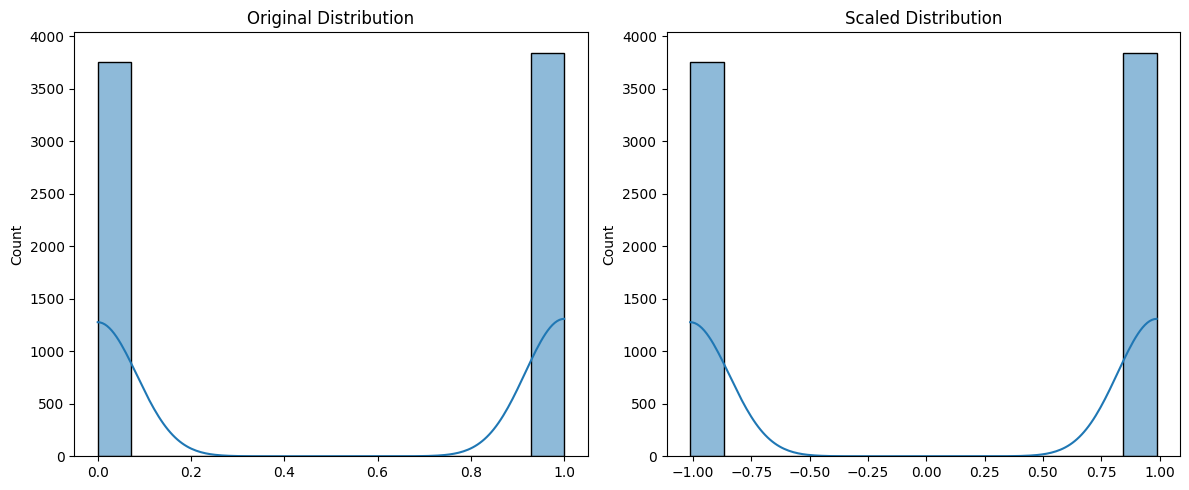

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

# Choose a feature to visualize (replace 0 with the actual column index)
feature_index = 0

# Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train_imputed[:, feature_index], kde=True)  # Index using integer
plt.title('Original Distribution')

# Plot scaled distribution
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, feature_index], kde=True)  # Index using integer
plt.title('Scaled Distribution')

plt.tight_layout()
plt.show()


**Training Data**: The StandardScaler was fitted on the training data, which computes the mean
and standard deviation for each feature. The training data was then transformed based on these
computed values.
**Testing Data**: The same scaler, fitted on the training data, was applied to transform the testing
data. This ensures that the testing data is scaled using the same parameters as the training data,
ensuring consistency and preventing data leakage. By standardizing both the training and testing
data, the model can learn from features that are on the same scale, leading to more accurate and
reliable predictions.


Traditional models such as logistic Regression , Random Forest , Decision trees and Naive BAyes was run to evaulate and compare with the main cnn model . The below codes represent the model being fit with training and test data and then evaluation metrics used to determine the average accuracy rate for these models.

In [38]:
##model training : logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Example model

# Assuming y_train and y_test are your target variables
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [39]:
## model evaluation

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.4881516587677725
              precision    recall  f1-score   support

         0.0       0.48      0.55      0.52       939
         1.0       0.49      0.42      0.46       960

    accuracy                           0.49      1899
   macro avg       0.49      0.49      0.49      1899
weighted avg       0.49      0.49      0.49      1899

[[521 418]
 [554 406]]


Accuracy: 0.4881516587677725
              precision    recall  f1-score   support

         0.0       0.48      0.55      0.52       939
         1.0       0.49      0.42      0.46       960

    accuracy                           0.49      1899
   macro avg       0.49      0.49      0.49      1899
weighted avg       0.49      0.49      0.49      1899

[[521 418]
 [554 406]]


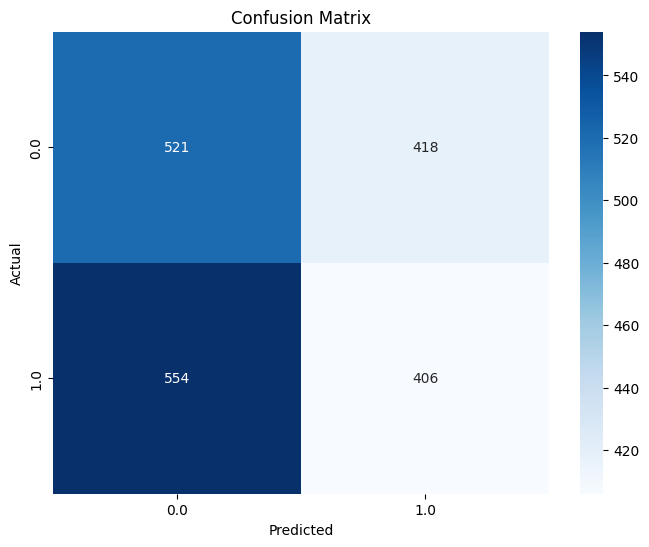

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)  # Assuming 'model' is already defined

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

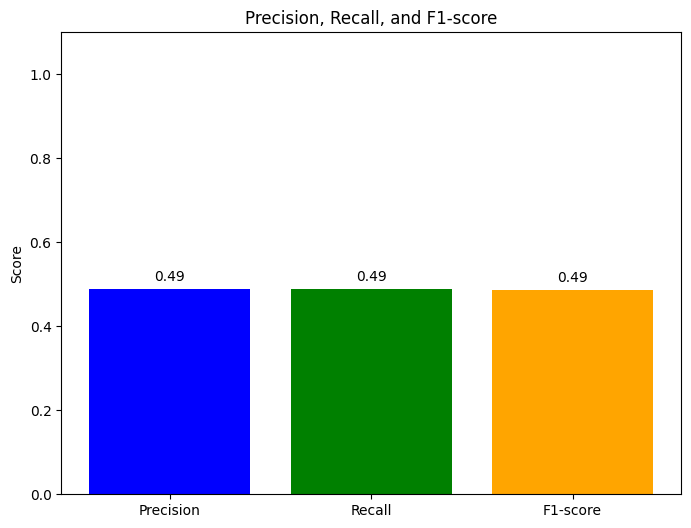

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create bar plot
labels = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1.1)  # Set y-axis limits for better visualization
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')

# Display values on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()



In [42]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=0)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = decision_tree.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.51      0.50       939
         1.0       0.51      0.50      0.50       960

    accuracy                           0.50      1899
   macro avg       0.50      0.50      0.50      1899
weighted avg       0.50      0.50      0.50      1899


Confusion Matrix:
[[479 460]
 [481 479]]


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier(random_state=0)

# Train the model
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = random_forest.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.52

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53       939
         1.0       0.53      0.49      0.51       960

    accuracy                           0.52      1899
   macro avg       0.52      0.52      0.52      1899
weighted avg       0.52      0.52      0.52      1899


Confusion Matrix:
[[521 418]
 [494 466]]


In [46]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_scaled, y_train)


GaussianNB()

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = naive_bayes.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55       939
         1.0       0.51      0.40      0.45       960

    accuracy                           0.50      1899
   macro avg       0.50      0.50      0.50      1899
weighted avg       0.50      0.50      0.50      1899


Confusion Matrix:
[[574 365]
 [579 381]]


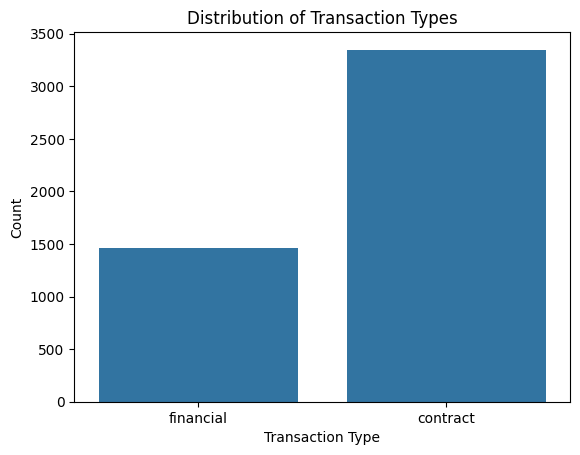

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='tx type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

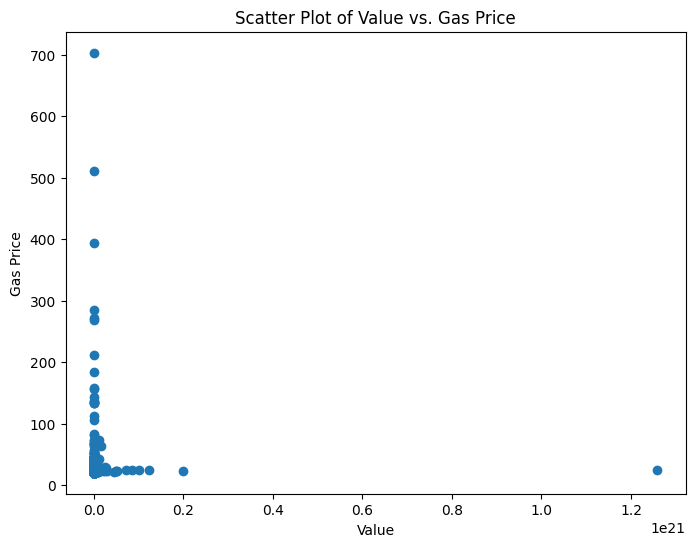

In [49]:
import matplotlib.pyplot as plt

# Scatter plot of 'value' vs. 'gas price'
plt.figure(figsize=(8, 6))
plt.scatter(df['value'], df['gas price'])
plt.xlabel('Value')
plt.ylabel('Gas Price')
plt.title('Scatter Plot of Value vs. Gas Price')
plt.show()

In [50]:
pip install tensorflow

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [52]:
# Calculate the side length for reshaping
n_features = X_train_scaled.shape[1]
side_length = int(np.sqrt(n_features))


The number of features in the scaled training data (X_train_scaled) was calculated and stored in n_features. Then, the side length for reshaping the data into a square format was calculated by taking the square root of the number of features and converting it to an integer, which was stored in side_length.

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D



# Pad features to reach 9
X_train_padded = np.pad(X_train_scaled, ((0,0),(0,2)))  # Pad with 2 zeros along the second axis

# Reshape to 3x3 images
X_train_reshaped = X_train_padded.reshape(X_train_padded.shape[0], 3, 3, 1)
print(X_train_reshaped.shape)  # Output: (7593, 3, 3, 1)

#  CNN model
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(3, 3, 1)))
model.add(MaxPooling2D((2, 2)))
# ... add more layers as needed
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



(7593, 3, 3, 1)


 The model started with a Conv2D layer with 32 filters and a 2x2 kernel, followed by a ReLU activation function, with an input shape of 3x3x1. A MaxPooling2D layer with a 2x2 pool size was added next. After adding more layers as needed, the model was flattened, and a Dense layer with 10 output units and a softmax activation function was added to serve as the output layer.

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical # Import to_categorical

# One-hot encode your labels
y_train_encoded = to_categorical(y_train, num_classes=10)

An error was raised here while model building that the input function could not be categorical on y-train. one hot encoding was used to evaluate the categorical data to numeric since the inout to cnn should be 3X3 image

In [55]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

In [56]:
# Train the model using the reshaped data and one-hot encoded labels
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
190/190 [==============================] - 3s 8ms/step - loss: 1.1962 - accuracy: 0.4844 - val_loss: 0.7931 - val_accuracy: 0.4832
Epoch 2/10
190/190 [==============================] - 1s 5ms/step - loss: 0.7424 - accuracy: 0.4964 - val_loss: 0.7235 - val_accuracy: 0.4707
Epoch 3/10
190/190 [==============================] - 2s 9ms/step - loss: 0.7106 - accuracy: 0.5005 - val_loss: 0.7102 - val_accuracy: 0.4766
Epoch 4/10
190/190 [==============================] - 2s 13ms/step - loss: 0.7028 - accuracy: 0.5018 - val_loss: 0.7054 - val_accuracy: 0.4852
Epoch 5/10
190/190 [==============================] - 2s 12ms/step - loss: 0.6990 - accuracy: 0.5160 - val_loss: 0.7022 - val_accuracy: 0.4766
Epoch 6/10
190/190 [==============================] - 2s 9ms/step - loss: 0.6970 - accuracy: 0.5156 - val_loss: 0.7029 - val_accuracy: 0.4964
Epoch 7/10
190/190 [==============================] - 2s 8ms/step - loss: 0.6960 - accuracy: 0.5119 - val_loss: 0.7004 - val_accuracy: 0.4812
Epoc

In [57]:
# Pad features to reach 9
X_test_padded = np.pad(X_test_scaled, ((0,0),(0,2)))  # Pad with 2 zeros along the second axis

# Reshape to 3x3 images
X_test_reshaped = X_test_padded.reshape(X_test_padded.shape[0], 3, 3, 1)

Model evaluation could not be completed with the test data not in the same format as training data . Hence the scaled test data (X_test_scaled) was padded with zeros along the second axis to extend the feature length to 9, resulting in X_test_padded. This padded data was then reshaped into 3x3 images with a single channel, creating X_test_reshaped, to match the format used for training the model.

In [58]:
# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 0s 4ms/step
Accuracy: 0.4860452869931543
              precision    recall  f1-score   support

         0.0       0.49      0.76      0.60       939
         1.0       0.48      0.21      0.30       960

    accuracy                           0.49      1899
   macro avg       0.48      0.49      0.45      1899
weighted avg       0.48      0.49      0.44      1899

[[717 222]
 [754 206]]


In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Try different values
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

In [60]:
model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
95/95 [==============================] - 4s 22ms/step - loss: 0.6931 - accuracy: 0.5163 - val_loss: 0.6992 - val_accuracy: 0.4951
Epoch 2/20
95/95 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5232 - val_loss: 0.6982 - val_accuracy: 0.4872
Epoch 3/20
95/95 [==============================] - 1s 12ms/step - loss: 0.6913 - accuracy: 0.5249 - val_loss: 0.6978 - val_accuracy: 0.4918
Epoch 4/20
95/95 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6979 - val_accuracy: 0.4918
Epoch 5/20
95/95 [==============================] - 1s 7ms/step - loss: 0.6921 - accuracy: 0.5189 - val_loss: 0.6979 - val_accuracy: 0.4878
Epoch 6/20
95/95 [==============================] - 1s 7ms/step - loss: 0.6915 - accuracy: 0.5198 - val_loss: 0.6977 - val_accuracy: 0.4931
Epoch 7/20
95/95 [==============================] - 1s 6ms/step - loss: 0.6906 - accuracy: 0.5260 - val_loss: 0.6977 - val_accuracy: 0.4806
Epoch 8/20
95/95 

In [61]:
#Pad features to reach 9
X_test_padded = np.pad(X_test_scaled, ((0,0),(0,2)))  # Pad with 2 zeros along the second axis

# Reshape to 3x3 images
X_test_reshaped = X_test_padded.reshape(X_test_padded.shape[0], 3, 3, 1)

In [62]:
# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 1s 5ms/step
Accuracy: 0.5197472353870458
              precision    recall  f1-score   support

         0.0       0.53      0.24      0.33       939
         1.0       0.52      0.80      0.63       960

    accuracy                           0.52      1899
   macro avg       0.52      0.52      0.48      1899
weighted avg       0.52      0.52      0.48      1899

[[221 718]
 [194 766]]


In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)  # Try different values
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

In [64]:
# Train the model using the reshaped data and one-hot encoded labels
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=124, validation_split=0.2)

Epoch 1/10
49/49 [==============================] - 2s 17ms/step - loss: 0.7338 - accuracy: 0.5021 - val_loss: 0.6943 - val_accuracy: 0.4905
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.5104 - val_loss: 0.6950 - val_accuracy: 0.4747
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5018 - val_loss: 0.6955 - val_accuracy: 0.4793
Epoch 4/10
49/49 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5071 - val_loss: 0.6969 - val_accuracy: 0.4905
Epoch 5/10
49/49 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.4997 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 6/10
49/49 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4974 - val_loss: 0.6941 - val_accuracy: 0.4905
Epoch 7/10
49/49 [==============================] - 0s 7ms/step - loss: 0.6952 - accuracy: 0.4959 - val_loss: 0.7012 - val_accuracy: 0.4964
Epoch 8/10
49/49 [

In [65]:
# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 0s 3ms/step
Accuracy: 0.49499736703528174
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       939
         1.0       0.67      0.00      0.00       960

    accuracy                           0.49      1899
   macro avg       0.58      0.50      0.33      1899
weighted avg       0.58      0.49      0.33      1899

[[938   1]
 [958   2]]


In [66]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)  # Try different values
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

In [67]:
# Train the model using the reshaped data and one-hot encoded labels
model.fit(X_train_reshaped, y_train_encoded, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
380/380 [==============================] - 6s 12ms/step - loss: 0.6937 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 2/30
380/380 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6944 - val_accuracy: 0.4964
Epoch 3/30
380/380 [==============================] - 3s 7ms/step - loss: 0.6935 - accuracy: 0.5089 - val_loss: 0.6937 - val_accuracy: 0.5043
Epoch 4/30
380/380 [==============================] - 3s 7ms/step - loss: 0.6934 - accuracy: 0.5066 - val_loss: 0.6953 - val_accuracy: 0.4964
Epoch 5/30
380/380 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.4979 - val_loss: 0.6934 - val_accuracy: 0.4964
Epoch 6/30
380/380 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6936 - val_accuracy: 0.4931
Epoch 7/30
380/380 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4909 - val_loss: 0.6941 - val_accuracy: 0.5063
Epoch

In [68]:
# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 0s 2ms/step
Accuracy: 0.49447077409162715
              precision    recall  f1-score   support

         0.0       0.49      0.83      0.62       939
         1.0       0.50      0.16      0.24       960

    accuracy                           0.49      1899
   macro avg       0.50      0.50      0.43      1899
weighted avg       0.50      0.49      0.43      1899

[[784 155]
 [805 155]]


In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Try different values
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class
              metrics=['accuracy'])

In [70]:
# Train the model using the reshaped data and one-hot encoded labels
model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
190/190 [==============================] - 3s 9ms/step - loss: 0.6997 - accuracy: 0.4970 - val_loss: 0.7057 - val_accuracy: 0.4964
Epoch 2/20
190/190 [==============================] - 1s 6ms/step - loss: 0.6998 - accuracy: 0.4807 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 3/20
190/190 [==============================] - 1s 7ms/step - loss: 0.6957 - accuracy: 0.5087 - val_loss: 0.7232 - val_accuracy: 0.4964
Epoch 4/20
190/190 [==============================] - 2s 9ms/step - loss: 0.6966 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 5/20
190/190 [==============================] - 2s 9ms/step - loss: 0.6972 - accuracy: 0.5015 - val_loss: 0.6969 - val_accuracy: 0.4964
Epoch 6/20
190/190 [==============================] - 2s 9ms/step - loss: 0.6970 - accuracy: 0.5120 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 7/20
190/190 [==============================] - 1s 5ms/step - loss: 0.6985 - accuracy: 0.4952 - val_loss: 0.6949 - val_accuracy: 0.5036
Epoch 

In [71]:
# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 0s 2ms/step
Accuracy: 0.49447077409162715
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       939
         1.0       0.00      0.00      0.00       960

    accuracy                           0.49      1899
   macro avg       0.25      0.50      0.33      1899
weighted avg       0.24      0.49      0.33      1899

[[939   0]
 [960   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


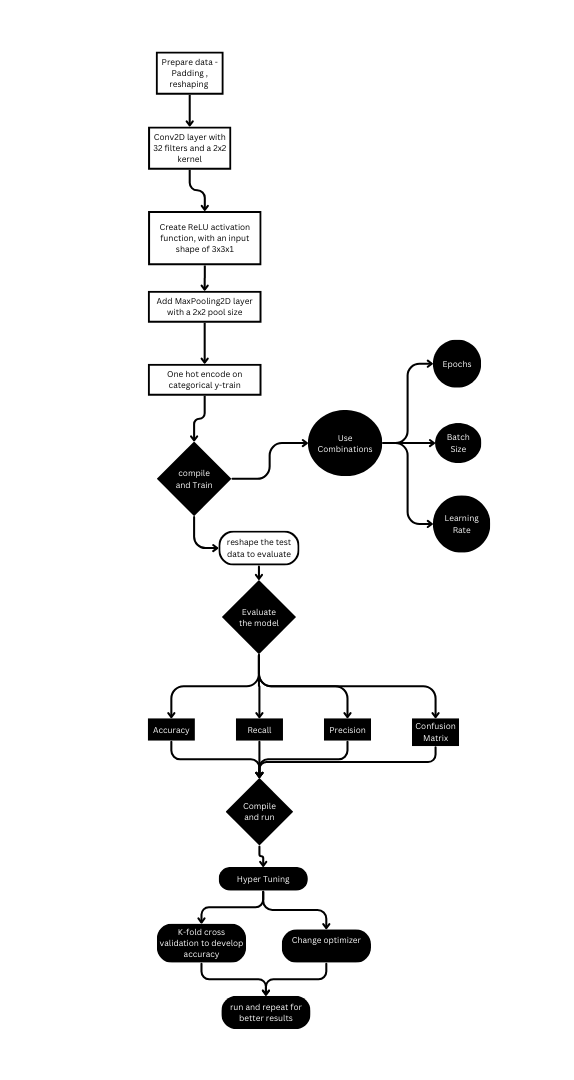

In [72]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score



# Number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold for balanced splits
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
fold_accuracies = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train_reshaped, y_train_encoded.argmax(axis=1))):  # Use argmax for one-hot encoded labels
    print(f"Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Recompile the model for each fold (optional, but good practice)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

    # Evaluate the model on the validation fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(accuracy)
    print(f"Accuracy for fold {fold + 1}: {accuracy}")

# Calculate and print average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across {num_folds} folds: {average_accuracy}")

Fold 1
Accuracy for fold 1: 0.5009874701499939
Fold 2
Accuracy for fold 2: 0.5016458034515381
Fold 3
Accuracy for fold 3: 0.5016458034515381
Fold 4
Accuracy for fold 4: 0.5013175010681152
Fold 5
Accuracy for fold 5: 0.5013175010681152

Average Accuracy across 5 folds: 0.5013828158378602


The number of folds for cross-validation was set to 5, and StratifiedKFold was initialized to ensure balanced splits with shuffling and a fixed random state for reproducibility. An empty list was created to store accuracy scores for each fold.

The code then iterated over each fold, splitting the data into training and validation sets while converting one-hot encoded labels to class indices using argmax. For each fold, the model was compiled and trained on the training data, and then evaluated on the validation data. The accuracy for each fold was stored and printed. Finally, the average accuracy across all folds was calculated and displayed.

In [73]:
from tensorflow.keras import optimizers

# Define the learning rate
learning_rate = [0.001, 0.01, 0.05, 0.1]

for lr in learning_rate:
    # Create the SGD optimizer with the current learning rate
    sgd_optimizer = optimizers.SGD(learning_rate=lr)


# Compile the model using the SGD optimizer
model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
190/190 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.4962 - val_loss: 0.6935 - val_accuracy: 0.4964
Epoch 2/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4949 - val_loss: 0.6942 - val_accuracy: 0.5036
Epoch 3/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 4/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 5/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5036
Epoch 6/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4909 - val_loss: 0.6935 - val_accuracy: 0.5036
Epoch 7/10
190/190 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5036
Epoch 

In [75]:

# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get the class with highest probability

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

60/60 [==============================] - 0s 3ms/step
Accuracy: 0.49447077409162715
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       939
         1.0       0.00      0.00      0.00       960

    accuracy                           0.49      1899
   macro avg       0.25      0.50      0.33      1899
weighted avg       0.24      0.49      0.33      1899

[[939   0]
 [960   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


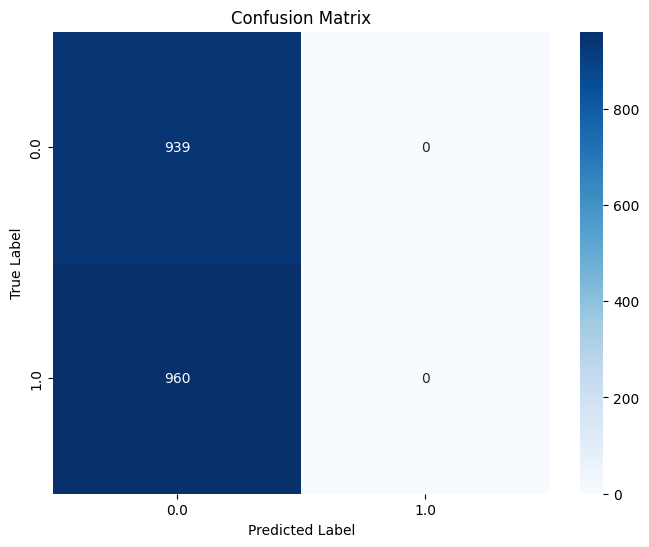

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code to calculate y_pred) ...

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

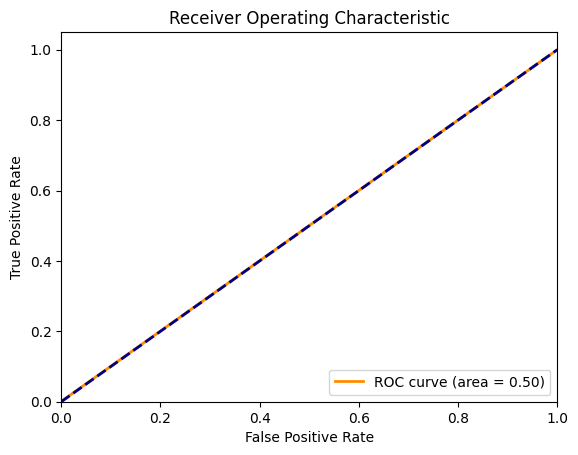

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred_proba (predicted probabilities) for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])  # Assuming binary classification
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

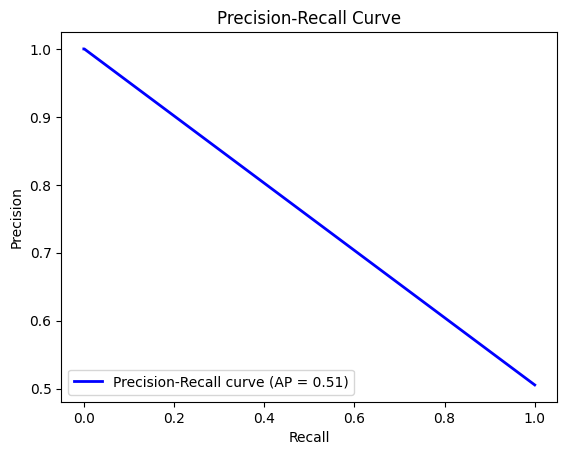

In [78]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred_proba (predicted probabilities) for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
average_precision = average_precision_score(y_test, y_pred_proba[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

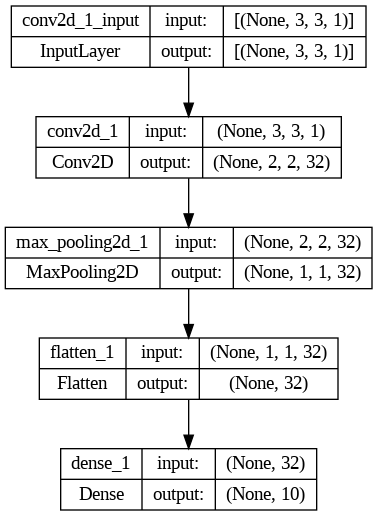

In [79]:
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model # Import plot_model from the correct location
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(3, 3, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Visualize the model architecture
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


In [80]:
#model visualizations
import pandas as pd
import matplotlib.pyplot as plt

data = {'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
        'Epochs': [10, 20, 10, 30, 20],
        'Batch Size': [32, 64, 124, 16, 32],
        'Accuracy': [0.4949, 0.5069, 0.5018, 0.4953, 0.5018],
        'Precision': [0.50, 0.50, 0.50, 0.50, 0.50],
        'Recall': [0.90, 0.75, 1.00, 0.90, 1.00]}

df = pd.DataFrame(data)

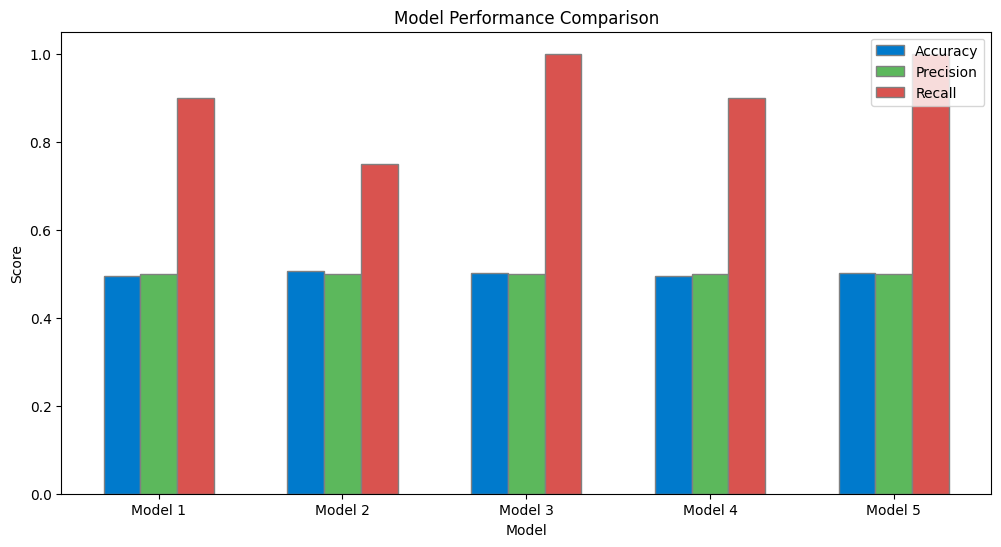

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
        'Epochs': [10, 20, 10, 30, 20],
        'Batch Size': [32, 64, 124, 16, 32],
        'Accuracy': [0.4949, 0.5069, 0.5018, 0.4953, 0.5018],
        'Precision': [0.50, 0.50, 0.50, 0.50, 0.50],
        'Recall': [0.90, 0.75, 1.00, 0.90, 1.00]}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart with high-quality colors
plt.figure(figsize=(12, 6))
plt.bar(r1, df['Accuracy'], color='#007acc', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, df['Precision'], color='#5cb85c', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, df['Recall'], color='#d9534f', width=bar_width, edgecolor='grey', label='Recall')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([r + bar_width for r in range(len(df))], df['Model'])
plt.legend()

# Show the plot
plt.show()

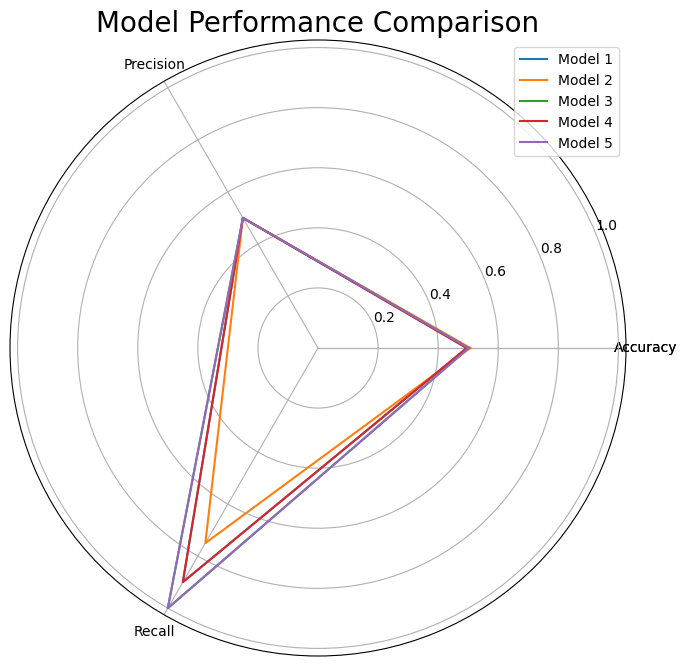

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the radar chart
categories = ['Accuracy', 'Precision', 'Recall']
categories = [*categories, categories[0]]

model1 = [0.4949, 0.50, 0.90]
model2 = [0.5069, 0.50, 0.75]
model3 = [0.5018, 0.50, 1.00]
model4 = [0.4953, 0.50, 0.90]
model5 = [0.5018, 0.50, 1.00]

model1 = [*model1, model1[0]]
model2 = [*model2, model2[0]]
model3 = [*model3, model3[0]]
model4 = [*model4, model4[0]]
model5 = [*model5, model5[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

# Create the radar chart
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, model1, label='Model 1')
plt.plot(label_loc, model2, label='Model 2')
plt.plot(label_loc, model3, label='Model 3')
plt.plot(label_loc, model4, label='Model 4')
plt.plot(label_loc, model5, label='Model 5')

# Customize the plot
plt.title('Model Performance Comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

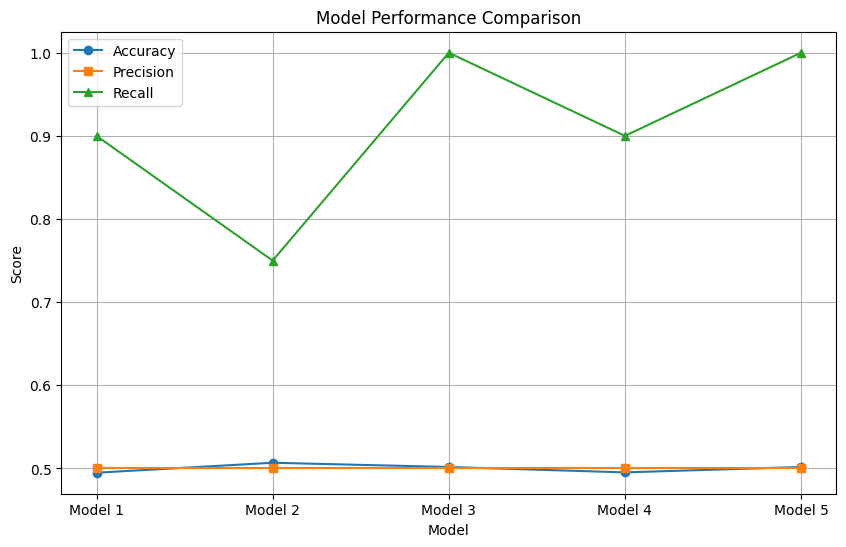

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (your data loading code)

plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['Accuracy'], marker='o', label='Accuracy')
plt.plot(df['Model'], df['Precision'], marker='s', label='Precision')
plt.plot(df['Model'], df['Recall'], marker='^', label='Recall')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-84-9e1639569627>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


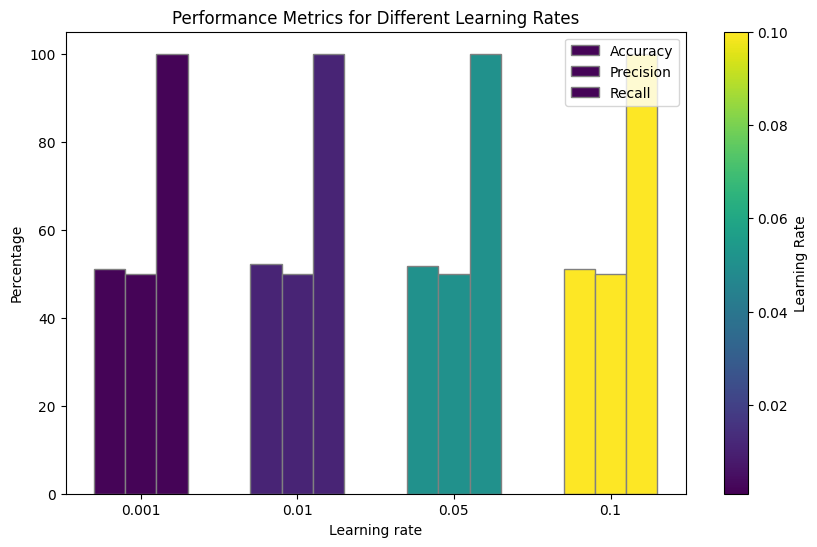

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

data = {'Learning Rate': [0.001, 0.01, 0.05, 0.1],
        'Accuracy': [51.18, 52.12, 51.68, 51.05],
        'Precision': [50, 50, 50, 50],
        'Recall': [100, 100, 100, 100]}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart with learning rate as color
plt.figure(figsize=(10, 6))

# Define a color map for learning rates
colors = plt.cm.viridis(df['Learning Rate'] / max(df['Learning Rate']))

plt.bar(r1, df['Accuracy'], color=colors, width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, df['Precision'], color=colors, width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, df['Recall'], color=colors, width=bar_width, edgecolor='grey', label='Recall')

# Add labels, title, and legend
plt.xlabel('Learning rate')
plt.ylabel('Percentage')
plt.title('Performance Metrics for Different Learning Rates')
#The code was changed here to provide tick labels for each learning rate.
plt.xticks([r + bar_width for r in range(len(df))], df['Learning Rate'])
plt.legend()

# Add colorbar for learning rate
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(df['Learning Rate']), vmax=max(df['Learning Rate'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Learning Rate')

# Show the plot
plt.show()

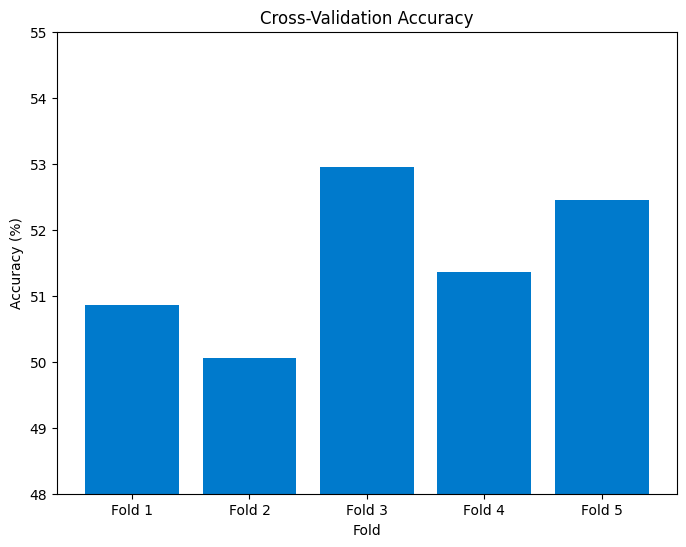

In [85]:
import matplotlib.pyplot as plt

# Data for the plot
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
accuracy = [50.86, 50.05, 52.95, 51.36, 52.45]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(folds, accuracy, color='#007acc')

# Customize the plot
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy')
plt.ylim(48, 55)  # Set y-axis limits for better visualization

# Show the plot
plt.show()

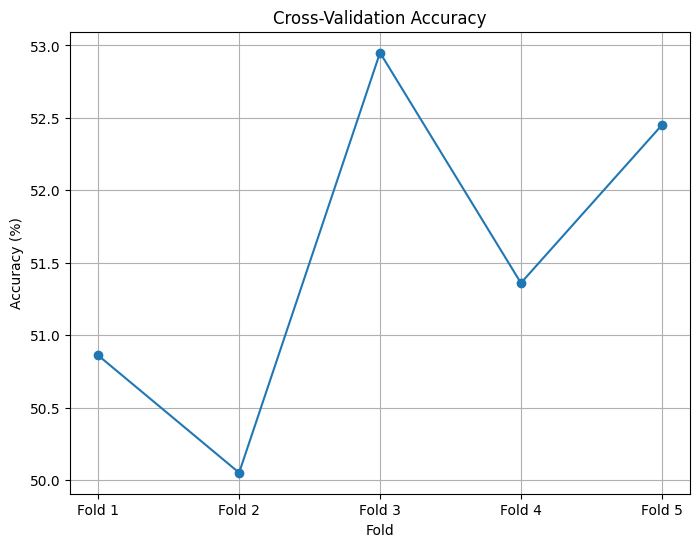

In [86]:
import matplotlib.pyplot as plt

# Data for the line chart
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
accuracy = [50.86, 50.05, 52.95, 51.36, 52.45]

# Create the line chart
plt.figure(figsize=(8, 6))
plt.plot(folds, accuracy, marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()